In [1]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

import statsmodels.api as sm
plt.style.use(style='seaborn')
%matplotlib inline

In [36]:
df = pd.read_csv('/home/icarus/Downloads/NABIL.csv', index_col = 'Date', parse_dates=True)

In [3]:
df.head(5)

,Price,Change,Max Price,Min Price,Prev Price,Transaction,Volume,Amount
Date,,,,,,,,
2019-03-31,712.0,-2.0,717.0,707.0,714.0,71,7019,4989640
2019-04-01,712.0,0.0,714.0,709.0,712.0,62,11973,8520110
2019-04-02,717.0,5.0,718.0,710.0,712.0,86,15403,10998100
2019-04-03,724.0,7.0,731.0,712.0,717.0,77,14196,10232000
2019-04-04,727.0,3.0,728.0,718.0,724.0,69,8188,5926770


In [4]:
df= df[['Price']].copy()

In [5]:
df.describe()

,Price
count,730.000000
mean,1026.346164
std,269.070615
min,660.000000
25%,791.225000
50%,898.800000
75%,1284.750000
max,1653.000000


In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.dropna())
print(f'ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistics: -1.2076105811956734
p-value: 0.6703132932765512


In [7]:
# p value is greater than 0.05 so we need to do differencing to make data stationary

In [8]:
from pmdarima.arima import utils

In [9]:
utils.ndiffs(df.Price)

1

In [10]:
# p is the order of the auto-regressive term
from statsmodels.graphics.tsaplots import plot_pacf

/home/icarus/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


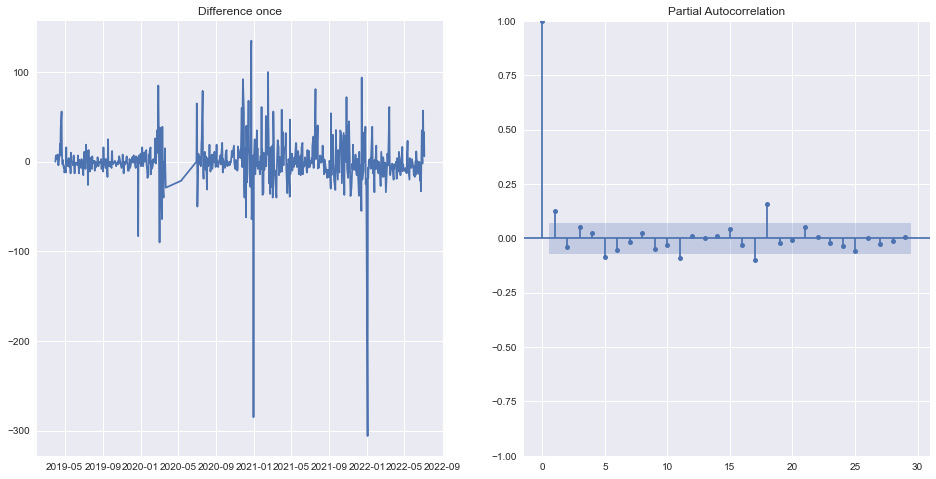

In [11]:
diff = df.Price.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax= ax2);

In [12]:
#use 18 as p as it stands out
from statsmodels.graphics.tsaplots import plot_acf

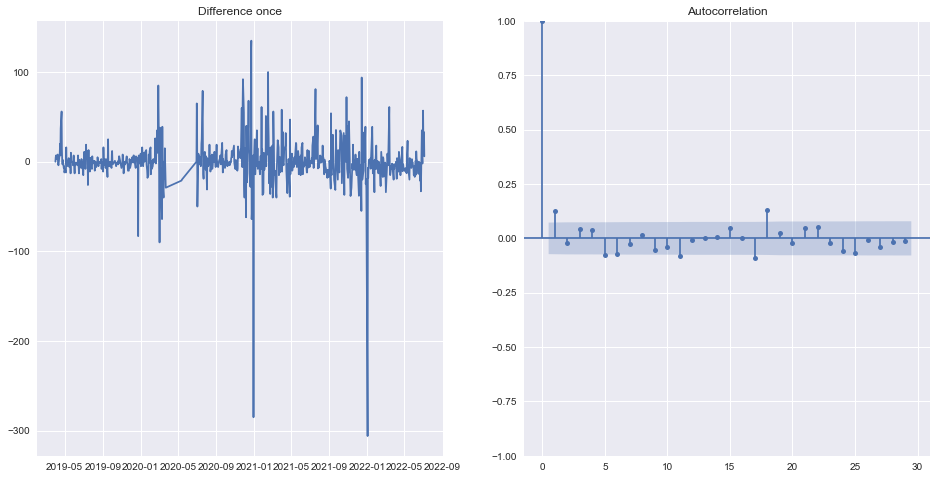

In [13]:
diff = df.Price.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax= ax2);

In [14]:
#use q = 1

In [15]:
from statsmodels.tsa.arima.model import ARIMA
#arima model
model = ARIMA(df.Price, order = (4,1,3))
result = model.fit()


/home/icarus/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/icarus/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/icarus/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/icarus/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

In [16]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  730
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -3384.494
Date:                Tue, 05 Jul 2022   AIC                           6784.988
Time:                        17:38:34   BIC                           6821.721
Sample:                             0   HQIC                          6799.161
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5444      0.143     10.834      0.000       1.265       1.824
ar.L2         -1.4570      0.188     -7.745      0.000      -1.826      -1.088
ar.L3          0.9265      0.169      5.490      0.0

(array([2.72001841e-05, 0.00000000e+00, 7.54805108e-03, 2.31201565e-03,
        2.72001841e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36000920e-05]),
 array([-295.24539967, -194.5208597 ,  -93.79631974,    6.92822023,
         107.6527602 ,  208.37730016,  309.10184013,  409.8263801 ,
         510.55092007,  611.27546003,  712.        ]),
 <BarContainer object of 10 artists>)

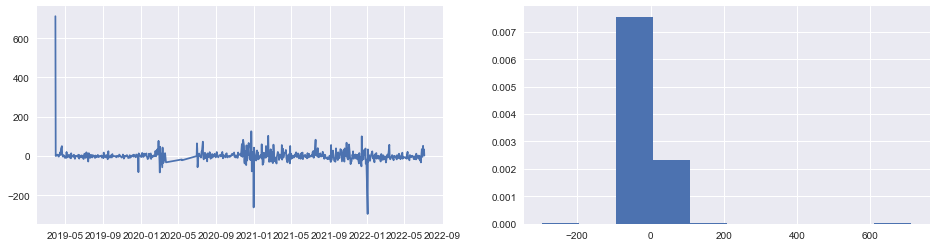

In [17]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

In [20]:
from statsmodels.graphics.tsaplots import plot_predict

<AxesSubplot:xlabel='Date'>

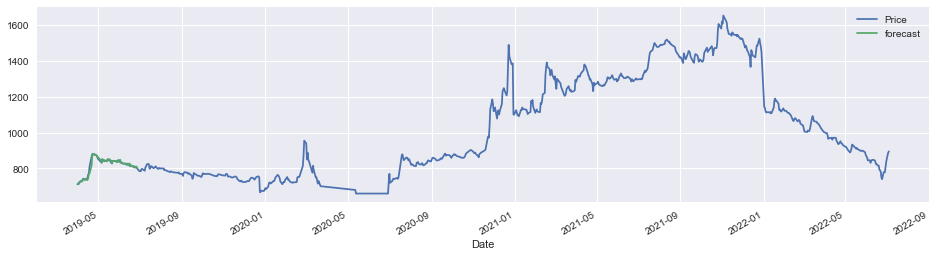

In [31]:
#actual vs fitted
df['forecast']= result.predict(start=1, end=60, dynamic=False)
df[['Price', 'forecast']].plot(figsize=(16,4))

In [43]:
#train tes split
n = int(len(df)) *0.8
train = df.Price[:int(n)]
test = df.Price[int(n):]

In [44]:
print(len(train))
print(len(test))

584
146


In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  730
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -3384.494
Date:                Tue, 05 Jul 2022   AIC                           6784.988
Time:                        18:01:59   BIC                           6821.721
Sample:                             0   HQIC                          6799.161
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5444      0.143     10.834      0.000       1.265       1.824
ar.L2         -1.4570      0.188     -7.745      0.000      -1.826      -1.088
ar.L3          0.9265      0.169      5.490      0.000       0.596       1.257
ar.L4         -0.1864      0.026     -7.093      0.000      -0.238      -0.135
ma.L1         -1.4212      0.144     -9.849      0.000      -1.704      -1.138
ma.L2          1.2488      0.188      6.635      0.000       0.880       1.618
ma.L3         -0.6747      0.165     -4.093      0.000      -0.998      -0.352
sigma2       630.9610     14.306     44.104      0.000     602.921     659.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             60352.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.32   Skew:                            -3.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
step = 30
fc = result.forecast(step)
conf =result.conf_int(alpha=0.05)


/home/icarus/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [82]:
fc = np.array(fc)
fc

array([896.86124043, 897.83209302, 894.48464573, 888.50644466,
       884.70333093, 884.2572349 , 884.19416821, 882.33729398,
       879.85696453, 878.75641834, 878.96174424, 878.93029351,
       878.02519607, 877.0685564 , 876.84238675, 877.05412468,
       876.99299782, 876.55885931, 876.21577083, 876.22231846,
       876.34144339, 876.27891881, 876.07881248, 875.97001505,
       876.01339739, 876.06515877, 876.01838756, 875.93121438,
       875.90459939, 875.93751895])

,0,1
ar.L1,1.265023,1.823801
ar.L2,-1.825655,-1.088261
ar.L3,0.595736,1.257345
ar.L4,-0.237900,-0.134895
ma.L1,-1.704076,-1.138399
ma.L2,0.879868,1.617696
ma.L3,-0.997804,-0.351590
sigma2,602.921383,659.000587


In [92]:
index_future_dates = pd.date_range(start='2022-07-04', end ='2022-09-02')
pred = result.predict(start=len(df.Price), end = len(df.Price)+60, type = 'levels').rename('Arima Predictions')

pred.index = index_future_dates
print(pred)

2022-07-04    896.861240
2022-07-05    897.832093
2022-07-06    894.484646
2022-07-07    888.506445
2022-07-08    884.703331
                 ...    
2022-08-29    875.882192
2022-08-30    875.882415
2022-08-31    875.882889
2022-09-01    875.882894
2022-09-02    875.882526
Freq: D, Name: Arima Predictions, Length: 61, dtype: float64


/home/icarus/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
